In [ ]:
#webmd reviews EDA general data analysis

In [64]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from matplotlib.pyplot import figure

In [9]:
webmd = pd.read_csv('webmd.csv')

In [10]:
stopwords = set(stopwords.words('english'))
#preprocessing, lowercase set, removing stopwords from reviews, setting all values to strings other than ratings
for colName in ['Drug','Condition','Reviews','Sides','Sex']:
    webmd[colName] = webmd[colName].str.lower()
    if colName == 'Reviews':
        webmd[colName]=webmd[colName].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))

#remove stopwords from all reviews
#for review in webmd.Reviews
#merge duplicate drugs with same Ids but different string names, some duplicate row issues under different name
for drugId in set(webmd['DrugId'].tolist()):
    drugs = set(webmd[webmd['DrugId']==drugId]['Drug'].tolist())
    if len(drugs)>1:#more than one drug under same id
        merge = min(drugs, key=len)
        webmd.loc[webmd['DrugId']==drugId, 'Drug'] = merge

webmd = webmd.drop_duplicates()
webmd.Reviews = webmd.Reviews.fillna('')

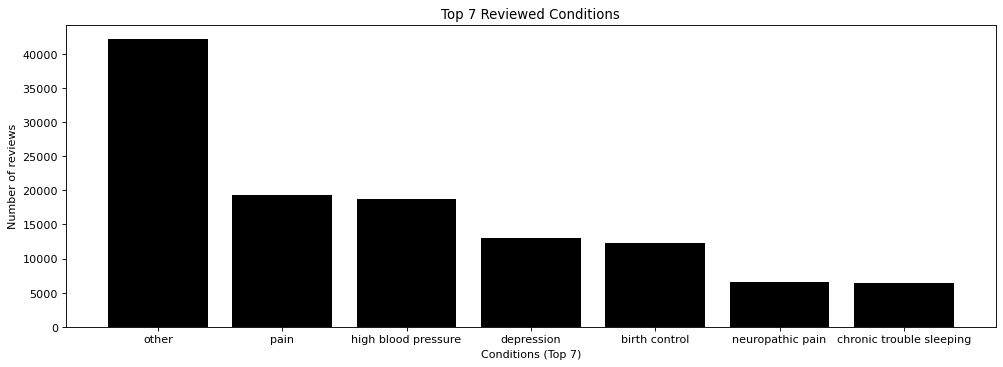

In [136]:
figure(figsize=(15, 5), dpi=80)
plt.xlabel("Conditions (Top 7)")
plt.ylabel("Number of reviews")
plt.bar(*zip(*Counter(webmd['Condition']).most_common(7)), color = 'black')
plt.title("Top 7 Reviewed Conditions")
plt.savefig('Top_7_Condition_bar.png')

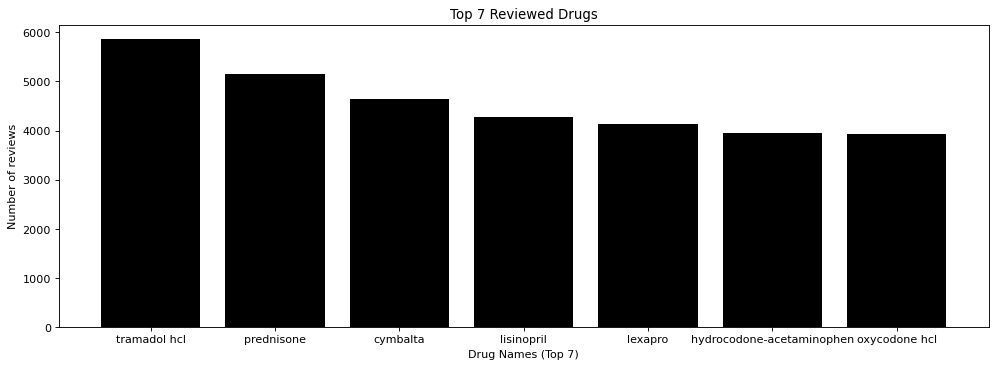

In [141]:
figure(figsize=(15, 5), dpi=80)
plt.xlabel("Drug Names (Top 7)")
plt.ylabel("Number of reviews")
plt.bar(*zip(*Counter(webmd['Drug']).most_common(7)), color = 'black')
plt.title("Top 7 Reviewed Drugs")
plt.savefig('Drugs.png')

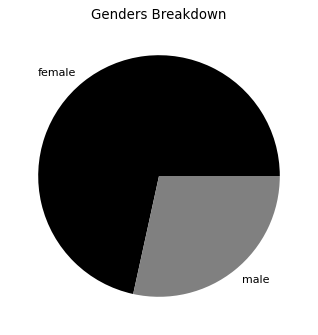

In [134]:
figure(figsize=(7, 5), dpi=80)
#plt.xlabel("Gender")
#plt.ylabel("Number of reviews")
values = [i[1] for i in Counter(webmd['Sex']).most_common(2)]
labels = [i[0] for i in Counter(webmd['Sex']).most_common(2)]
plt.pie(values, labels = labels, colors = ['black','grey'])
plt.title("Genders Breakdown")
plt.savefig('Genders.png')

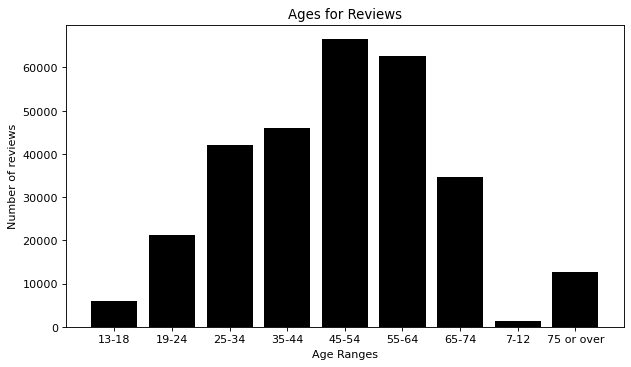

In [135]:
figure(figsize=(9, 5), dpi=80)
ages = sorted(Counter(webmd['Age']).most_common(10), key = lambda tup: tup[0])
ages.pop(0)#remove blank ages
plt.xlabel("Age Ranges")
plt.ylabel("Number of reviews")
plt.title("Ages for Reviews")
plt.bar(*zip(*ages), color='black')
plt.savefig('Ages_bar.png')